<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/MachineLearning_ALgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is dedicated to practising different Machine learning Algorithms**

The alogrithms are in the order:


*   Unsupervised Learning


1. K-means clustering

**Unsupervised Learning**

**K-Means clustering**

Article: https://realpython.com/k-means-clustering-python/

In [211]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [212]:
# Creating random data for salary clustering

incomeDF = {
    'Name': ['Kartikay', 'Mayank', 'Dileep', 'Saroj', 'Alika', 'Shruti', 'Reshmi', 'Robin', 'Dhananjay', 'Monu', 'Jijaji', 'xyz', 'abc', 'pqr'],
    'Age': [30, 29, 60, 60, 24, 30, 28, 30, 65, 35, 35, 15, 120, 200],
    'Income($)': [30000, 300000, 150000, 13000000, 500000, 4000000, 20000000, 70000, 8000000, 0, 1000000, 10000, 5000000, 80000]
}

IncomeData = pd.DataFrame(incomeDF)

In [213]:
IncomeData.head()

,Name,Age,Income($)
0,Kartikay,30,30000
1,Mayank,29,300000
2,Dileep,60,150000
3,Saroj,60,13000000
4,Alika,24,500000


Text(0, 0.5, 'Income($)')

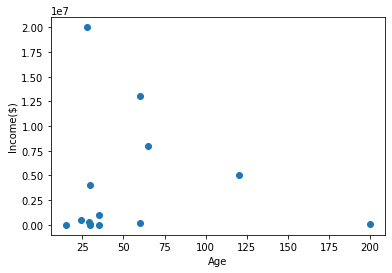

In [214]:
plt.scatter(IncomeData['Age'], IncomeData['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [215]:
# We can see from above plot that there may be 3 clusters i.e, ~30, ~35, ~60
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(IncomeData[ ['Age', 'Income($)'] ])
y_predicted

array([1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [216]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,30,30000,1
1,Mayank,29,300000,1
2,Dileep,60,150000,1
3,Saroj,60,13000000,2
4,Alika,24,500000,1
5,Shruti,30,4000000,0
6,Reshmi,28,20000000,2
7,Robin,30,70000,1
8,Dhananjay,65,8000000,0
9,Monu,35,0,1


In [217]:
km.cluster_centers_

array([[7.16666667e+01, 5.66666667e+06],
       [5.08888889e+01, 2.37777778e+05],
       [4.40000000e+01, 1.65000000e+07]])

In [218]:
# Creating 3 different df for different clusters
clusterDF0 = IncomeData[IncomeData.Cluster == 0]
clusterDF1 = IncomeData[IncomeData.Cluster == 1]
clusterDF2 = IncomeData[IncomeData.Cluster == 2]

Text(0, 0.5, 'Income($)')

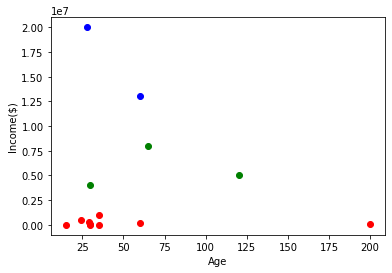

In [219]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [220]:
# Remember: if there are values that don't fit in green, red, blue change values in range 0-1 using MinMax Scalar - read.

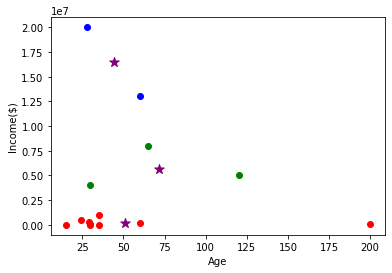

In [221]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')


# plotting the center of the cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', s=100)

**let us convert the values in the range of 0-1 for better clustering instead of using 0 - 200000 range - this is called normalizing the values.**

In [222]:
# let us convert the values in the range of 0-1 for better clustering instead of using 0 - 200000 range - this is called normalizing the values.

scaler = MinMaxScaler()
scaler.fit(IncomeData[['Income($)']])
IncomeData['Income($)'] = scaler.transform(IncomeData[['Income($)']])
scaler.fit(IncomeData[['Age']])
IncomeData['Age'] = scaler.transform(IncomeData[['Age']])
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,0.081081,0.0015,1
1,Mayank,0.075676,0.0150,1
2,Dileep,0.243243,0.0075,1
3,Saroj,0.243243,0.6500,2
4,Alika,0.048649,0.0250,1
5,Shruti,0.081081,0.2000,0
6,Reshmi,0.070270,1.0000,2
7,Robin,0.081081,0.0035,1
8,Dhananjay,0.270270,0.4000,0
9,Monu,0.108108,0.0000,1


Text(0, 0.5, 'Income($)')

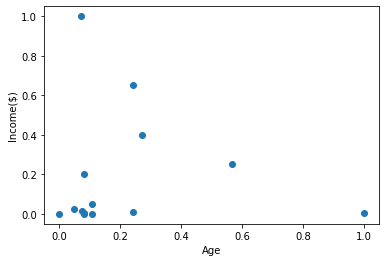

In [223]:
plt.scatter(IncomeData['Age'], IncomeData['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [224]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(IncomeData[ ['Age', 'Income($)'] ])
y_predicted

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2], dtype=int32)

In [225]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,0.081081,0.0015,1
1,Mayank,0.075676,0.0150,1
2,Dileep,0.243243,0.0075,1
3,Saroj,0.243243,0.6500,0
4,Alika,0.048649,0.0250,1
5,Shruti,0.081081,0.2000,1
6,Reshmi,0.070270,1.0000,0
7,Robin,0.081081,0.0035,1
8,Dhananjay,0.270270,0.4000,0
9,Monu,0.108108,0.0000,1


In [226]:
# putting the y_predicted in the existing dataframe to see which clusters people belong t0
IncomeData['Cluster']=y_predicted
IncomeData

,Name,Age,Income($),Cluster
0,Kartikay,0.081081,0.0015,1
1,Mayank,0.075676,0.0150,1
2,Dileep,0.243243,0.0075,1
3,Saroj,0.243243,0.6500,0
4,Alika,0.048649,0.0250,1
5,Shruti,0.081081,0.2000,1
6,Reshmi,0.070270,1.0000,0
7,Robin,0.081081,0.0035,1
8,Dhananjay,0.270270,0.4000,0
9,Monu,0.108108,0.0000,1


In [227]:
km.cluster_centers_

array([[0.19459459, 0.68333333],
       [0.09189189, 0.03366667],
       [0.78378378, 0.127     ]])

In [228]:
# Creating 3 different df for different clusters
clusterDF0 = IncomeData[IncomeData.Cluster == 0]
clusterDF1 = IncomeData[IncomeData.Cluster == 1]
clusterDF2 = IncomeData[IncomeData.Cluster == 2]

Text(0, 0.5, 'Income($)')

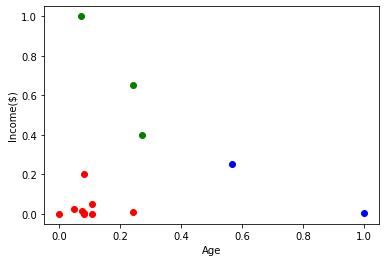

In [229]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

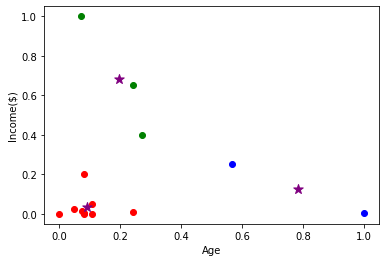

In [230]:
plt.scatter(clusterDF0['Age'],  clusterDF0['Income($)'], color = 'green')
plt.scatter(clusterDF1['Age'],  clusterDF1['Income($)'], color = 'red')
plt.scatter(clusterDF2['Age'],  clusterDF2['Income($)'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')


# plotting the center of the cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', s=100)

In [231]:
# Let us check the data for particular clusters
set(IncomeData['Cluster'])

{0, 1, 2}

In [232]:
IncomeData[IncomeData['Cluster'] == 2]

,Name,Age,Income($),Cluster
12,abc,0.567568,0.250,2
13,pqr,1.000000,0.004,2


**Real-World problem : arXiv dataset clustering from kartikaysingh.com**

In [233]:
textlist = []

text_file = open("/content/drive/MyDrive/Google Colab Data /arXiv_titles.txt", "r")
lines = text_file.readlines()

textlist.append(lines)

text_file.close()

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [235]:
# testing - text clustering

textList = []

textDataList = ['Kartikay, Dileep, Saroj, Shagun, Mayank, Robin, Shruti']

for info in textDataList:
  textList.append(info.split(','))




In [236]:
textList

[['Kartikay', ' Dileep', ' Saroj', ' Shagun', ' Mayank', ' Robin', ' Shruti']]

In [237]:
document = pd.DataFrame(textList[0], columns=['FirstName'])
document


,FirstName
0,Kartikay
1,Dileep
2,Saroj
3,Shagun
4,Mayank
5,Robin
6,Shruti


In [238]:
details = ['Singh', 'Singh', 'Singh', 'Singh', 'Solanki', 'Aryawal', 'Mishra']

document['LastName'] = details
# document = document['LastName'].values.astype("U")
document

,FirstName,LastName
0,Kartikay,Singh
1,Dileep,Singh
2,Saroj,Singh
3,Shagun,Singh
4,Mayank,Solanki
5,Robin,Aryawal
6,Shruti,Mishra


In [239]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(document['LastName'])

In [240]:
k = 4

model = KMeans(n_clusters = k, init='k-means++', max_iter=100, n_init=1 )
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [241]:
document['Clusters'] = model.labels_

In [242]:
document

,FirstName,LastName,Clusters
0,Kartikay,Singh,0
1,Dileep,Singh,0
2,Saroj,Singh,0
3,Shagun,Singh,0
4,Mayank,Solanki,1
5,Robin,Aryawal,3
6,Shruti,Mishra,2


In [243]:
# let us check how clusters are seperated


print("Cluster centroids: \n")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
  print("Cluster %d: "% i)

  for j in order_centroids[i, :10]:
    print( '%s' % terms[j])
    print('--------------------------------')

Cluster centroids: 

Cluster 0: 
singh
--------------------------------
solanki
--------------------------------
mishra
--------------------------------
aryawal
--------------------------------
Cluster 1: 
solanki
--------------------------------
singh
--------------------------------
mishra
--------------------------------
aryawal
--------------------------------
Cluster 2: 
mishra
--------------------------------
solanki
--------------------------------
singh
--------------------------------
aryawal
--------------------------------
Cluster 3: 
aryawal
--------------------------------
solanki
--------------------------------
singh
--------------------------------
mishra
--------------------------------


In [244]:
textlist

[['Calculation of prompt diphoton production cross sections at Tevatron and\n',
  '  LHC energiesSparsity-certifying Graph DecompositionsThe evolution of the Earth-Moon system based on the dark matter field\n',
  '  fluid modelA determinant of Stirling cycle numbers counts unlabeled acyclic\n',
  '  single-source automataFrom dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_{\\alpha}$Bosonic characters of atomic Cooper pairs across resonancePolymer Quantum Mechanics and its Continuum LimitNumerical solution of shock and ramp compression for general material\n',
  '  propertiesThe Spitzer c2d Survey of Large, Nearby, Insterstellar Clouds. IX. The\n',
  '  Serpens YSO Population As Observed With IRAC and MIPSPartial cubes: structures, characterizations, and constructionsComputing genus 2 Hilbert-Siegel modular forms over $\\Q(\\sqrt{5})$ via\n',
  '  the Jacquet-Langlands correspondenceDistribution of integral Fourier Coefficients of a Modular Form of Half\n',
  '  Integral Weight Modulo Primes$

In [245]:
JournalDF = pd.DataFrame(textlist[0], columns=['Titles'])
JournalDF.head()


,Titles
0,Calculation of prompt diphoton production cros...
1,LHC energiesSparsity-certifying Graph Decomp...
2,fluid modelA determinant of Stirling cycle n...
3,single-source automataFrom dyadic $\Lambda_{...
4,"propertiesThe Spitzer c2d Survey of Large, N..."


In [247]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(JournalDF['Titles'])

In [248]:
k = 20

model = KMeans(n_clusters = k, init='k-means++', max_iter=100, n_init=1 )
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [249]:
JournalDF['Clusters'] = model.labels_

In [250]:
JournalDF.head(20)

,Titles,Clusters
0,Calculation of prompt diphoton production cros...,2
1,LHC energiesSparsity-certifying Graph Decomp...,11
2,fluid modelA determinant of Stirling cycle n...,2
3,single-source automataFrom dyadic $\Lambda_{...,13
4,"propertiesThe Spitzer c2d Survey of Large, N...",2
5,Serpens YSO Population As Observed With IRAC...,2
6,the Jacquet-Langlands correspondenceDistribu...,2
7,Integral Weight Modulo Primes$p$-adic Limit ...,2
8,WeightIterated integral and the loop product...,2
9,QuiescenceIn quest of a generalized Callias ...,2


In [251]:
# let us check how clusters are seperated


print("Cluster centroids: \n")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
  print("Cluster %d: "% i)

  for j in order_centroids[i, :10]:
    print( '%s' % terms[j])
    print('--------------------------------')

Cluster centroids: 

Cluster 0: 
star
--------------------------------
formation
--------------------------------
galaxy
--------------------------------
galaxies
--------------------------------
cluster
--------------------------------
clusters
--------------------------------
mass
--------------------------------
forming
--------------------------------
ngc
--------------------------------
stellar
--------------------------------
Cluster 1: 
analysis
--------------------------------
based
--------------------------------
data
--------------------------------
using
--------------------------------
time
--------------------------------
model
--------------------------------
quantum
--------------------------------
non
--------------------------------
systems
--------------------------------
learning
--------------------------------
Cluster 2: 
based
--------------------------------
non
--------------------------------
time
--------------------------------
energy
-----------------------

In [252]:
JournalDF[JournalDF['Clusters'] == 12]

,Titles,Clusters
249,detector at LEP-2Evolutionary Neural Gas (EN...,12
416,derivativesTransient Dynamics of Sparsely Co...,12
422,the Basis of Modern Experimental Data from P...,12
1092,isolated and interacting galaxiesPeriod-two ...,12
1446,January 15Towards observable signatures of o...,12
...,...,...
810682,Qualitative AbstractionsRepresenting perturb...,12
811858,Information ProcessorSemiclassical Neural Ne...,12
815865,arbitrary laser intensity and detuningTrappe...,12
817663,Kubo-Mori MetricQuantum Tomography Approach ...,12
